In [1]:
import scanpy as sc
from anndata.experimental import concat_on_disk
from umap import UMAP
import numpy as np

import bionty as bt
from scdataloader.utils import get_all_ancestors

import matplotlib

import datamapplot

→ connected lamindb: jkobject/scprint2


In [ ]:
# run the model in parallel in a slurm job
# conda activate scprint17
srun -p gpu -q gpu --gres=gpu:A40:4,gmem:40G --cpus-per-task 16 --mem-per-gpu 32G --ntasks-per-node=4 scprint predict --config config/base.yml --config config/pretrain_medium.yml --config config/predict.yml --ckpt_path /pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/vbd8bavn/checkpoints/epoch=17-step=90000.ckpt --model.pred_embedding ["cell_type_ontology_term_id"]

SyntaxError: invalid decimal literal (143214592.py, line 3)

In [ ]:
# combine the data into a nice umap
srun -p ml4ig -c 32 --mem 90G python figures/niceumap.py

In [ ]:
ls -alh ../data/step_0_predict.h5ad

-rw-r--r-- 1 jkalfon ml4ig 332M May 30 18:17 ../data/step_0_predict.h5ad


In [2]:
data_directory = "/pasteur/appa/scratch/jkalfon/45322258/"
name = "18hebyht"

In [3]:
adata = sc.read_h5ad(data_directory + name + "_predict.h5ad")  # , backed="r")
adata

AnnData object with n_obs × n_vars = 16406560 × 0
    obs: 'pred_cell_type_ontology_term_id', 'pred_tissue_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_age_group', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'pred_cell_culture', 'conv_pred_cell_type_ontology_term_id', 'conv_pred_tissue_ontology_term_id', 'conv_pred_disease_ontology_term_id', 'conv_pred_age_group', 'conv_pred_assay_ontology_term_id', 'conv_pred_self_reported_ethnicity_ontology_term_id', 'leiden_1.0'
    uns: 'leiden_1.0', 'neighbors', 'umap'
    obsm: 'X_umap', 'scprint_emb_cell_type_ontology_term_id'
    obsp: 'connectivities', 'distances'

In [7]:
adata.obs["conv_pred_self_reported_ethnicity_ontology_term_id"].value_counts()

conv_pred_self_reported_ethnicity_ontology_term_id
British                       14100138
Singaporean Indian              780242
African American                533931
Han Chinese                     443371
European American               177812
Hispanic or Latin American      136567
African                         107627
Singaporean Chinese              43089
Korean                           31413
Finnish                          16698
Japanese                         16031
Iraqi                             7091
American                          5043
Bangladeshi                       4286
Pacific Islander                  2502
Jewish Israeli                     719
Name: count, dtype: int64

In [ ]:
# matplotlib.rcParams["figure.dpi"] = 150 # 150
# matplotlib.rcParams['font.family'] = 'Regular'

In [6]:
adata.obsm["X_umap"]

array([[ -6.0111303,  -4.827699 ],
       [  1.4033751,   8.006785 ],
       [ 18.57125  ,  -2.7888746],
       ...,
       [ 10.658946 ,  -2.9543104],
       [-10.650308 ,  -6.404247 ],
       [ -9.00503  ,   3.0074298]], dtype=float32)

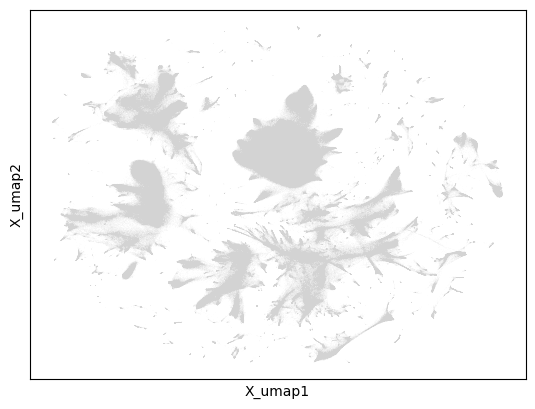

In [13]:
sc.pl.embedding(adata[:1_500_000], "X_umap")

/pasteur/appa/homes/jkalfon/scPRINT/.venv/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = colors_list


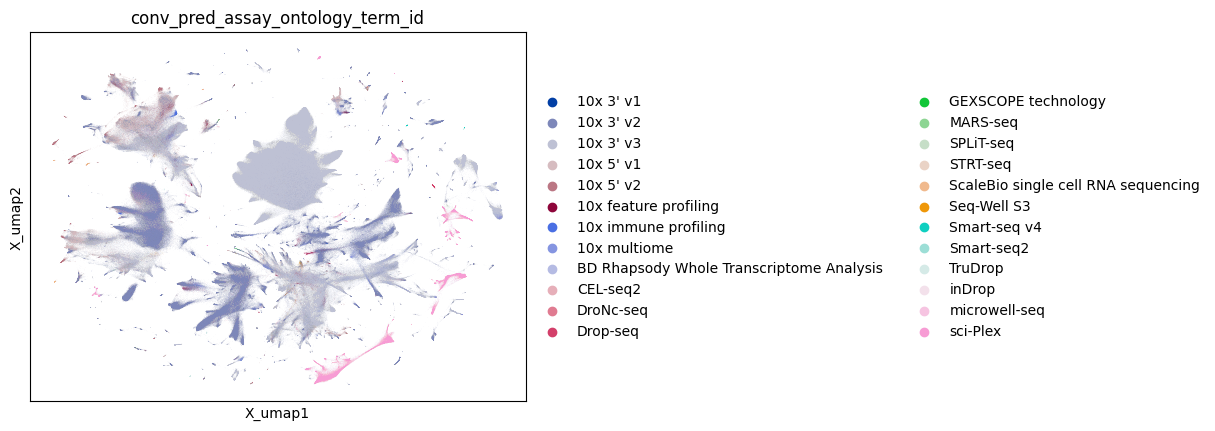

In [15]:
sc.pl.embedding(adata[:2000000], "X_umap", color="conv_pred_assay_ontology_term_id")

/pasteur/appa/homes/jkalfon/scPRINT/.venv/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = colors_list


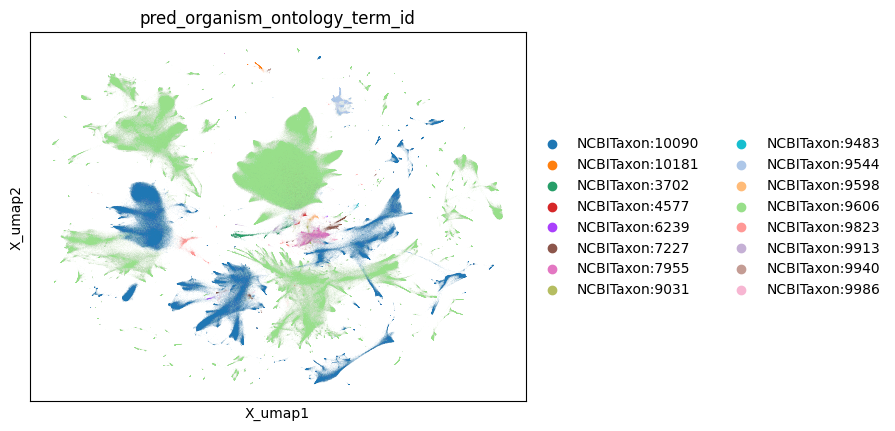

In [16]:
sc.pl.embedding(adata[:2000000], "X_umap", color="pred_organism_ontology_term_id")

/pasteur/appa/homes/jkalfon/scPRINT/.venv/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = colors_list


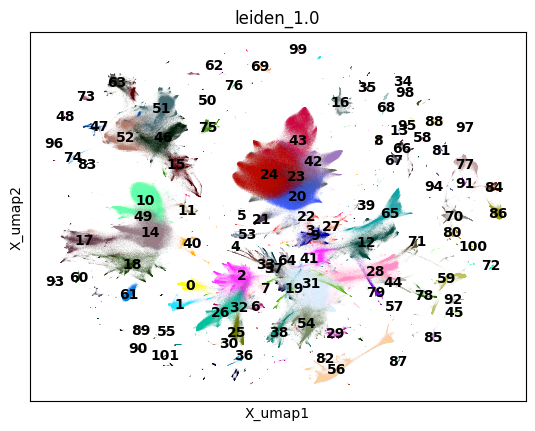

In [17]:
sc.pl.embedding(adata[:2000_000], "X_umap", color="leiden_1.0", legend_loc="on data")

In [ ]:
{
    i: k
    for i, k in adata[:2000_000]
    .obs[adata[:2000_000].obs["leiden_1.0"].isin(["56", "82"])][
        "conv_pred_cell_type_ontology_term_id"
    ]
    .value_counts()
    .items()
    if k > 1000
}

{'splanchnic mesodermal cell': 12669,
 'type EC enteroendocrine cell': 10055,
 'vascular leptomeningeal cell (Mmus)': 3073,
 'chondrocyte': 2585,
 'glomerular capillary endothelial cell': 1763,
 'basal cell of epidermis': 1280,
 'astrocyte of the cerebral cortex': 1081}

In [ ]:
{
    i: k
    for i, k in adata[:2000_000]
    .obs[adata[:2000_000].obs["leiden_1.0"].isin(["52", "51"])][
        "conv_pred_cell_type_ontology_term_id"
    ]
    .value_counts()
    .items()
    if k > 1000
}

{'naive regulatory T cell': 20660,
 'CD16-positive, CD56-dim natural killer cell, human': 20440,
 'effector memory CD8-positive, alpha-beta T cell': 12602,
 'central memory CD4-positive, alpha-beta T cell': 12373,
 'naive thymus-derived CD4-positive, alpha-beta T cell': 11923,
 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated': 5790,
 'CD8-alpha alpha positive, gamma-delta intraepithelial T cell': 5100,
 'naive thymus-derived CD8-positive, alpha-beta T cell': 3956,
 'immature natural killer cell': 3209,
 'MHC-II-positive classical monocyte': 1051}

/pasteur/appa/homes/jkalfon/scPRINT/.venv/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = colors_list


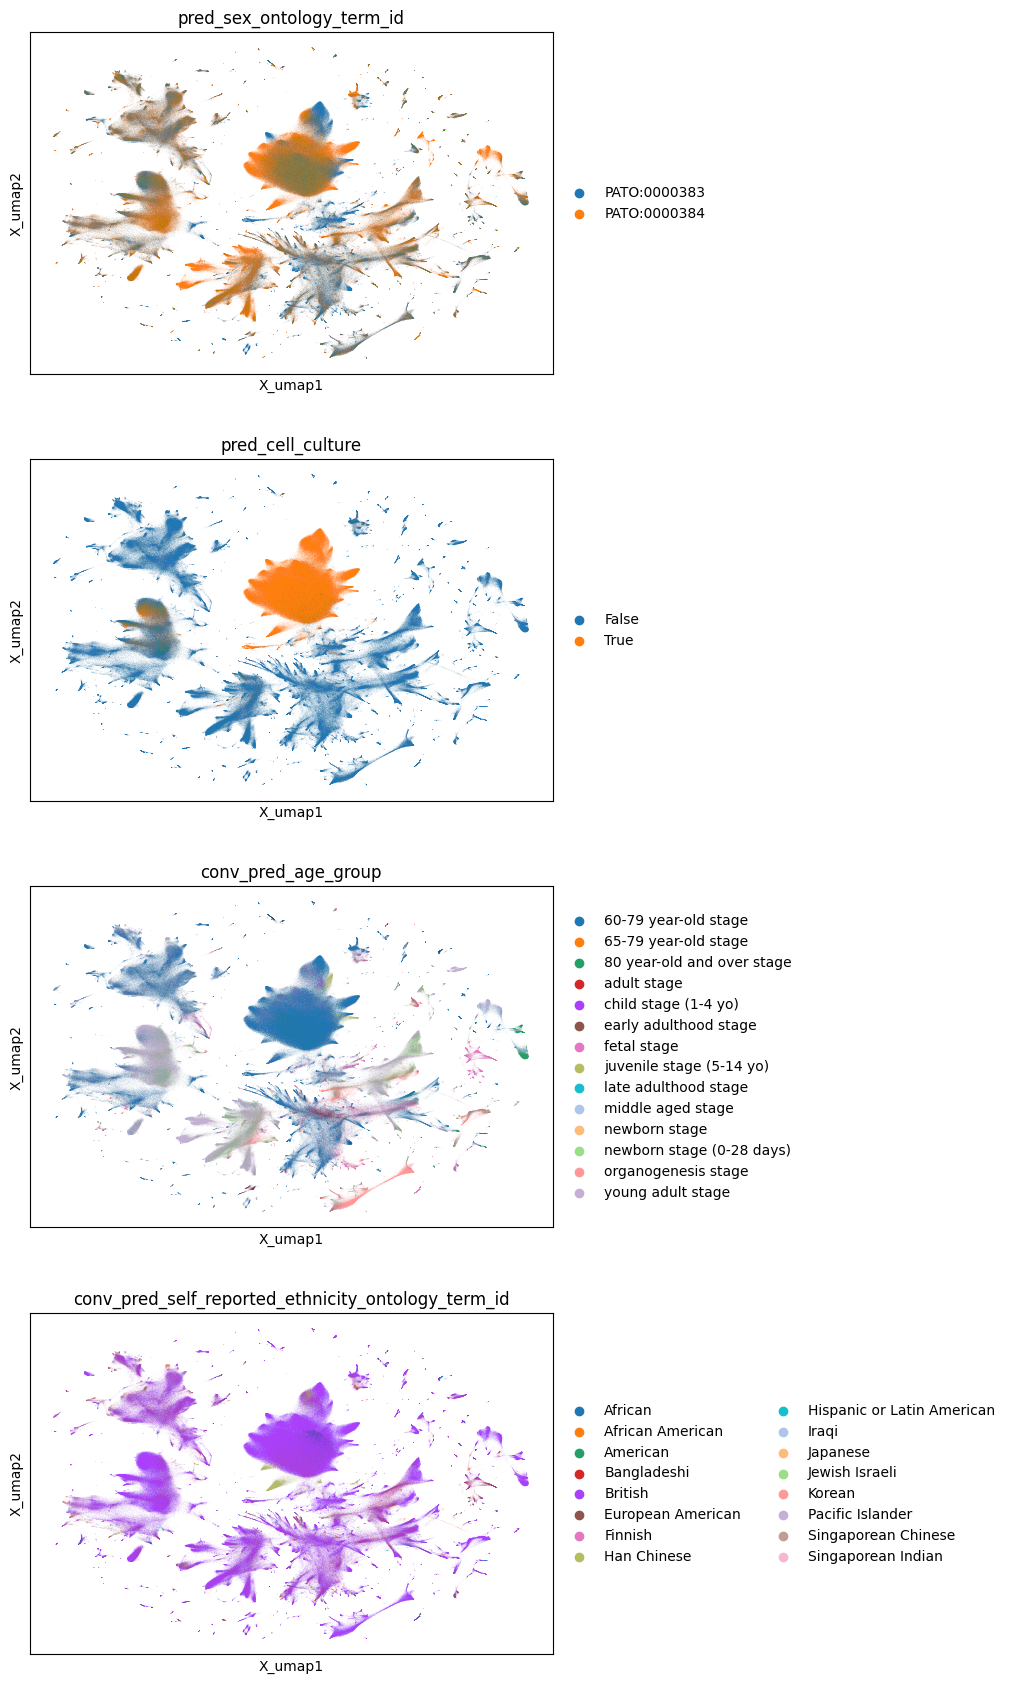

In [20]:
sc.pl.embedding(
    adata[:2000_000],
    "X_umap",
    color=[
        "pred_sex_ontology_term_id",
        "pred_cell_culture",
        "conv_pred_age_group",
        "conv_pred_self_reported_ethnicity_ontology_term_id",
    ],
    ncols=1,
)

In [10]:
res = {}
subres = {}
for i in [
    "pred_sex_ontology_term_id",
    "pred_organism_ontology_term_id",
    "pred_cell_culture",
    "conv_pred_cell_type_ontology_term_id",
    "conv_pred_tissue_ontology_term_id",
    "conv_pred_disease_ontology_term_id",
    "conv_pred_age_group",
    "conv_pred_assay_ontology_term_id",
    "conv_pred_self_reported_ethnicity_ontology_term_id",
    "leiden_1.0",
]:
    print(i)
    res[i] = adata.obs[i].value_counts()
    print(len(res[i]))
    subres[i] = {j: k for j, k in res[i].items() if k > 150}
    print(len(subres[i]))

pred_sex_ontology_term_id
2
2
pred_organism_ontology_term_id
16
16
pred_cell_culture
2
2
conv_pred_cell_type_ontology_term_id
337
253
conv_pred_tissue_ontology_term_id
174
140
conv_pred_disease_ontology_term_id
296
278
conv_pred_age_group
14
13
conv_pred_assay_ontology_term_id
24
23
conv_pred_self_reported_ethnicity_ontology_term_id
16
16
leiden_1.0
102
102


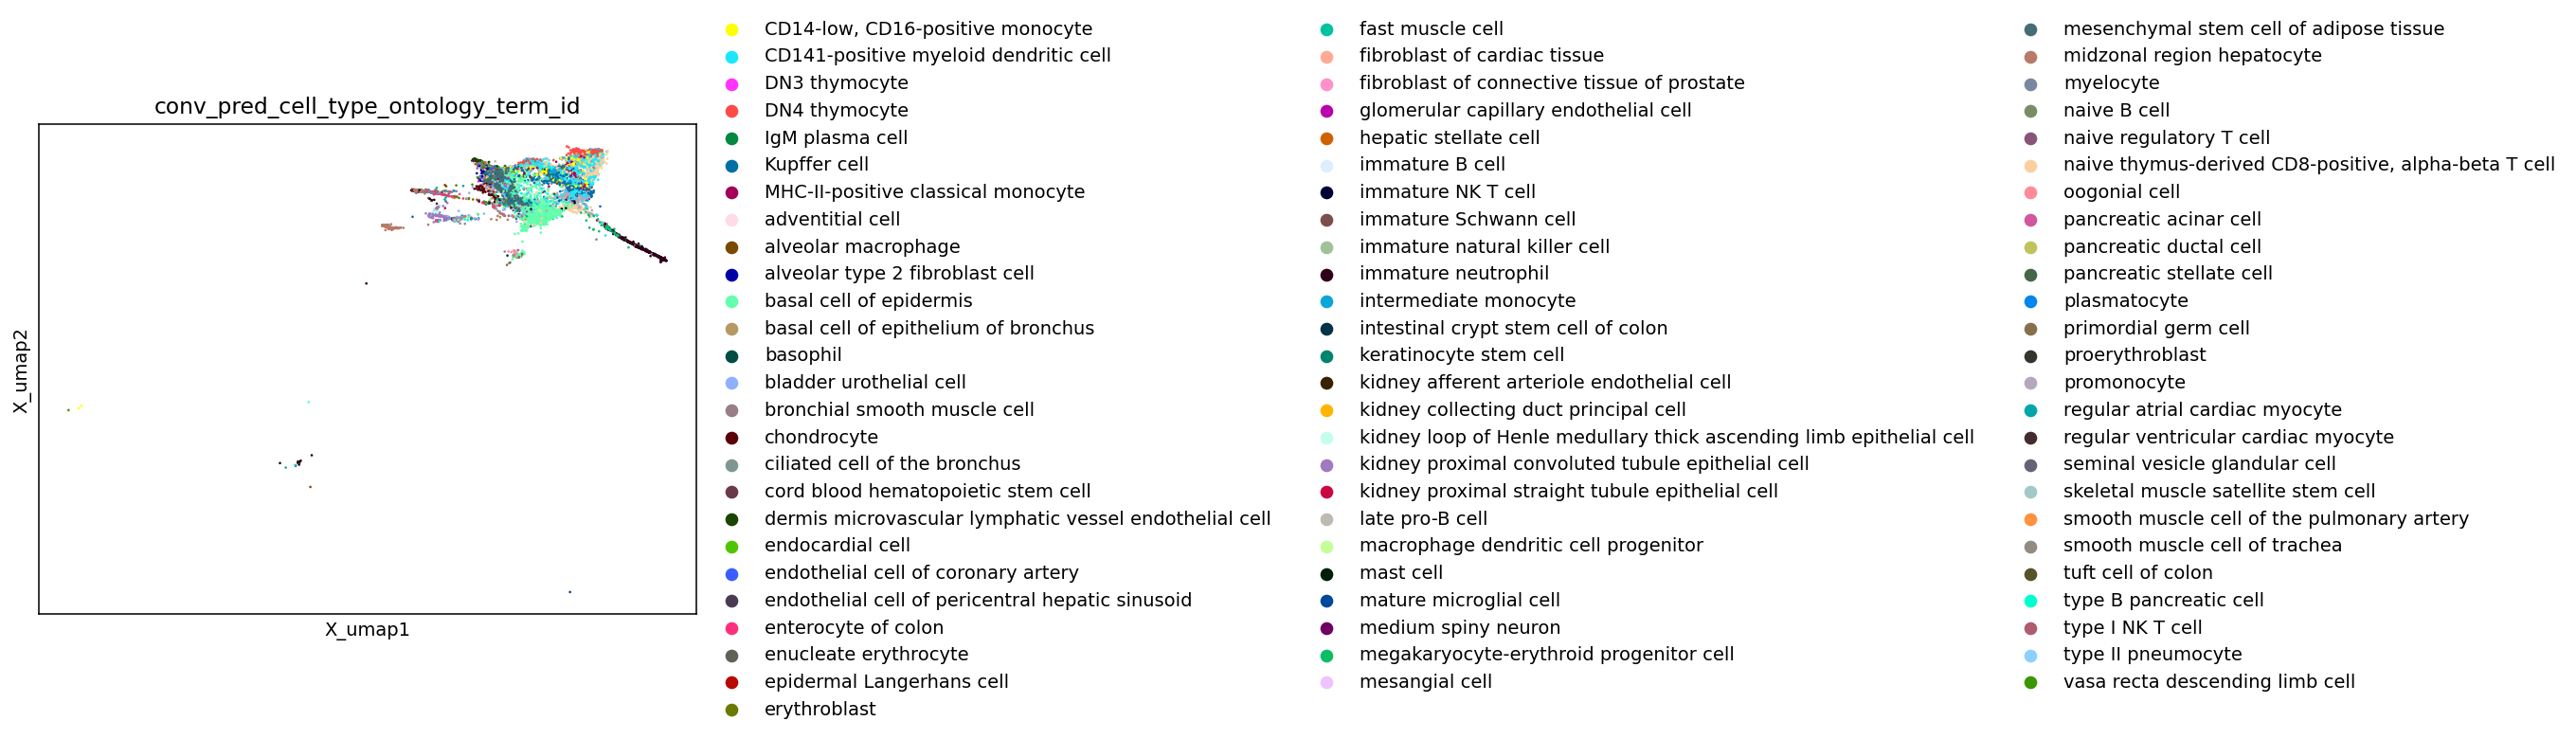

In [ ]:
subadata = adata[adata.obs["louvain_1.0"] == "59"].copy()
sc.pl.embedding(subadata, "X_umap", color="conv_pred_cell_type_ontology_term_id")

... storing 'label' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


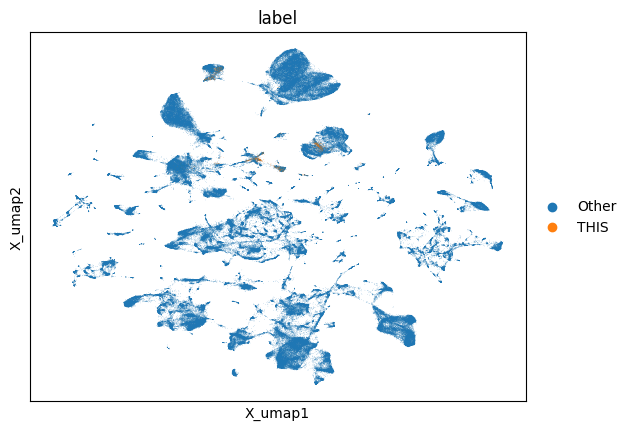

In [ ]:
adata.obs["label"] = "Other"
adata.obs.loc[
    # (adata.obs['louvain_0.5']=='17')
    # &
    (
        adata.obs["conv_pred_cell_type_ontology_term_id"]
        == "astrocyte of the cerebral cortex"
    ),
    "label",
] = "THIS"
sc.pl.embedding(adata, "X_umap", color="label")

In [ ]:
cat = "1.0"

adata.obs[(adata.obs["louvain_" + cat].isin([str(i) for i in range(12)]))][
    "pred_organism_ontology_term_id"
].value_counts().head(20)

pred_organism_ontology_term_id
NCBITaxon:9606     766182
NCBITaxon:10090     49050
Name: count, dtype: int64

In [ ]:
rename = {
    "0": "neurons and interneurons",
    "1": "dementia associated neurons and interneurons",
    "2": "cardiac fibroblasts and endothelial cells",
    "3": "normal t cells (10x v2)",
    "4": "covid associated t cells",
    "5": "oligodendrocytes precursors",
    "6": "covid associated monocytes",
    "7": "oligodendrocytes",
    "8": "glutamatergic neurons",
    "9": "neurons (sci-RNAseq)",
    "10": "monocytes",
    "11": "glutamatergic neurons (mouse)",
    "12": "endothelial cells",
    "13": "normal t cells (10x 5' v2)",
    "14": "covid associated t cells (10x 5' v1)",
    "15": "lupus associated t cells",
    "16": "microglial cells",
    "17": "fibroblasts",
    "18": "macroglial cells (sci-RNAseq)",
    "19": "myocytes",
    "20": "covid associated t cells (10x 5' v2)",
    "21": "tumor cells",
    "25": "cultured cells",
    "26": "lymphoma associated t cells",
    "32": "enterocytes",
    "35": "lupus associated monocytes",
    "42": "cerebellar cells (mouse)",
    "43": "cancer associated macrophages",
    "44": "glutamatergic neurons (mouse)",
    "49": "neurons (mouse)",
    "51": "covid associated B cells",
    "59": "mouse progenitor cells",
    "62": "cerebellar cells (mouse)",
    "63": "endothelial cells (mouse)",
    "73": "cancer associated t cells",
}

In [ ]:
num = "44"
cat = "1.0"
(
    adata.obs[adata.obs["louvain_" + cat] == num]["pred_organism_ontology_term_id"]
    .value_counts()
    .head(3),
    adata.obs[(adata.obs["louvain_" + cat] == num)][
        "conv_pred_cell_type_ontology_term_id"
    ]
    .value_counts()
    .head(20),
    adata.obs[adata.obs["louvain_" + cat] == num]["conv_pred_disease_ontology_term_id"]
    .value_counts()
    .head(10),
    adata.obs[adata.obs["louvain_" + cat] == num]["conv_pred_assay_ontology_term_id"]
    .value_counts()
    .head(10),
)

(pred_organism_ontology_term_id
 NCBITaxon:10090    22658
 NCBITaxon:9606         0
 Name: count, dtype: int64,
 conv_pred_cell_type_ontology_term_id
 L6 intratelencephalic projecting glutamatergic neuron of the primary motor cortex      8889
 L2/3 intratelencephalic projecting glutamatergic neuron of the primary motor cortex    4712
 L6 corticothalamic-projecting glutamatergic cortical neuron                            3688
 L5 extratelencephalic projecting glutamatergic cortical neuron                         2737
 L4/5 intratelencephalic projecting glutamatergic neuron of the primary motor cortex    1966
 sst chodl GABAergic cortical interneuron                                                533
 chandelier pvalb GABAergic cortical interneuron                                          58
 sncg GABAergic cortical interneuron                                                      35
 hippocampal neuron                                                                       13
 vip GABAergi

In [ ]:
adata.obs["merge_pred_cell_type_ontology_term_id"] = "None"
for k, v in rename.items():
    loc = adata.obs["louvain_1.0"] == k
    adata.obs.loc[loc, "merge_pred_cell_type_ontology_term_id"] = v

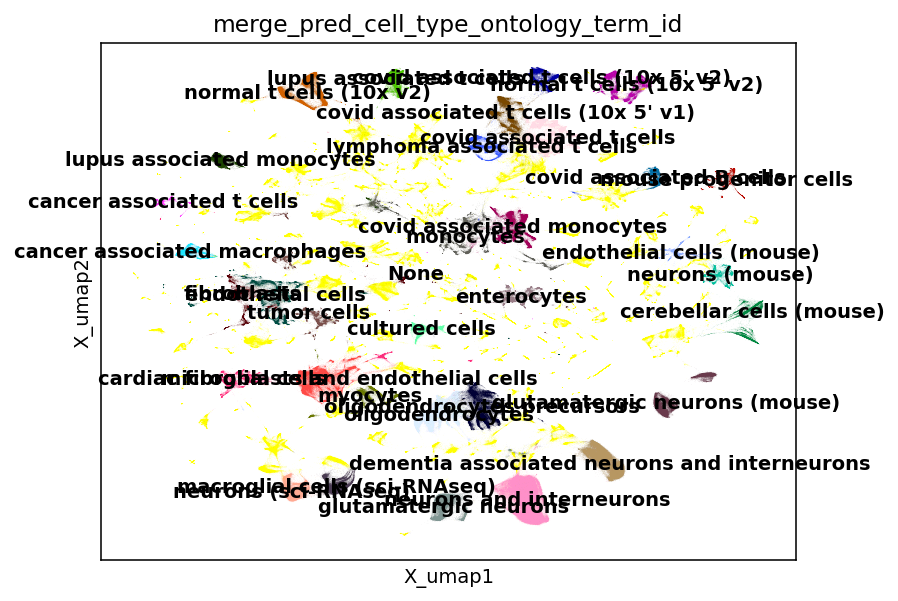

In [ ]:
sc.pl.embedding(
    adata, "X_umap", color="merge_pred_cell_type_ontology_term_id", legend_loc="on data"
)

In [ ]:
tokeep = [
    i
    for i, j in adata.obs["conv_pred_cell_type_ontology_term_id"].value_counts().items()
    if j > 10_000
]

adata.obs["conv_pred_cell_type_ontology_term_id"] = adata.obs[
    "conv_pred_cell_type_ontology_term_id"
].cat.add_categories("None")


adata.obs.loc[
    ~adata.obs["conv_pred_cell_type_ontology_term_id"].isin(tokeep),
    "conv_pred_cell_type_ontology_term_id",
] = "None"

In [8]:
from scdataloader.utils import translate

In [26]:
res.keys()

dict_keys(['pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'pred_cell_culture', 'conv_pred_cell_type_ontology_term_id', 'conv_pred_tissue_ontology_term_id', 'conv_pred_disease_ontology_term_id', 'conv_pred_age_group', 'conv_pred_assay_ontology_term_id', 'conv_pred_self_reported_ethnicity_ontology_term_id', 'leiden_1.0'])

In [11]:
rt = translate(
    res["pred_organism_ontology_term_id"].keys(), "organism_ontology_term_id"
)

In [12]:
rt = {j: rt[i] for i, j in enumerate(res["pred_organism_ontology_term_id"].keys())}

In [13]:
rt

{'NCBITaxon:9606': 'human',
 'NCBITaxon:10090': 'mouse',
 'NCBITaxon:9544': 'macaque',
 'NCBITaxon:7955': 'zebrafish',
 'NCBITaxon:9823': 'pig',
 'NCBITaxon:3702': 'arabidopsis thaliana',
 'NCBITaxon:7227': 'drosophila melanogaster (fruit fly)',
 'NCBITaxon:9031': 'chicken',
 'NCBITaxon:10181': 'naked mole-rat female',
 'NCBITaxon:9986': 'rabbit',
 'NCBITaxon:9913': 'cow',
 'NCBITaxon:4577': 'zea mays',
 'NCBITaxon:9598': 'chimpanzee',
 'NCBITaxon:6239': 'caenorhabditis elegans (nematode, n2)',
 'NCBITaxon:9940': 'sheep (texel)',
 'NCBITaxon:9483': 'white-tufted-ear marmoset'}

In [14]:
rt["NCBITaxon:9483"] = "marmoset"
rt["NCBITaxon:7227"] = "drosophila"
rt["NCBITaxon:3702"] = "arabidopsis"
rt["NCBITaxon:4577"] = "maize"
rt["NCBITaxon:6239"] = "c. elegans"
rt["NCBITaxon:9940"] = "sheep"

In [15]:
adata.obs["conv_pred_organism_ontology_term_id"] = adata.obs[
    "pred_organism_ontology_term_id"
].replace(rt)

/local/scratch/tmp/ipykernel_145710/1575082616.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ].replace(rt)


In [ ]:
import matplotlib
import colorcet
import seaborn as sns
from matplotlib.colors import rgb2hex

matplotlib.rcParams["figure.dpi"] = 72

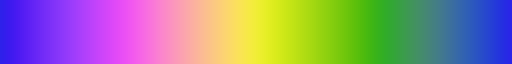

In [ ]:
from IPython.display import display_png

display_png(colorcet.cm.colorwheel)

In [78]:
np.unique(adata[:1000000].obs["conv_pred_organism_ontology_term_id"])

(array(['arabidopsis', 'c. elegans', 'chicken', 'chimpanzee', 'cow',
        'drosophila', 'human', 'macaque', 'maize', 'marmoset', 'mouse',
        'naked mole-rat female', 'pig', 'rabbit', 'sheep', 'zebrafish'],
       dtype=object),)

In [109]:
labels = np.unique(adata[:1000000].obs["conv_pred_organism_ontology_term_id"])
np.random.shuffle(labels)
custom_color_map = dict(
    zip(labels, map(rgb2hex, sns.color_palette("hls", len(labels))))
)
custom_color_map["Unlabelled"] = "#cccccc"

In [110]:
custom_color_map

{'zebrafish': '#db5f57',
 'mouse': '#db9057',
 'chicken': '#dbc257',
 'c. elegans': '#c3db57',
 'rabbit': '#91db57',
 'drosophila': '#5fdb57',
 'marmoset': '#57db80',
 'maize': '#57dbb2',
 'sheep': '#57d3db',
 'human': '#57a2db',
 'chimpanzee': '#5770db',
 'arabidopsis': '#6f57db',
 'naked mole-rat female': '#a157db',
 'pig': '#d357db',
 'cow': '#db57b2',
 'macaque': '#db5780',
 'Unlabelled': '#cccccc'}

In [60]:
available_fonts

['Cantarell',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmb10',
 'cmex10',
 'cmmi10',
 'cmr10',
 'cmss10',
 'cmsy10',
 'cmtt10']

In [62]:
from matplotlib import font_manager

# Get all available font families
available_fonts = sorted(set([f.name for f in font_manager.fontManager.ttflist]))

print(f"Total available system fonts: {len(available_fonts)}")

# Check for common fonts
common_fonts = [
    "Arial",
    "Helvetica",
    "Times New Roman",
    "Georgia",
    "Verdana",
    "Courier New",
    "DejaVu Sans",
    "Impact",
    "Trebuchet MS",
    "Palatino",
]

for font in common_fonts:
    if font in available_fonts:
        print(f"✓ {font}")
    else:
        print(f"✗ {font} (not available)")

Total available system fonts: 23
✗ Arial (not available)
✗ Helvetica (not available)
✗ Times New Roman (not available)
✗ Georgia (not available)
✗ Verdana (not available)
✗ Courier New (not available)
✓ DejaVu Sans
✗ Impact (not available)
✗ Trebuchet MS (not available)
✗ Palatino (not available)


Calculating medoids: 100%|██████████| 16/16 [00:47<00:00,  2.98s/it]



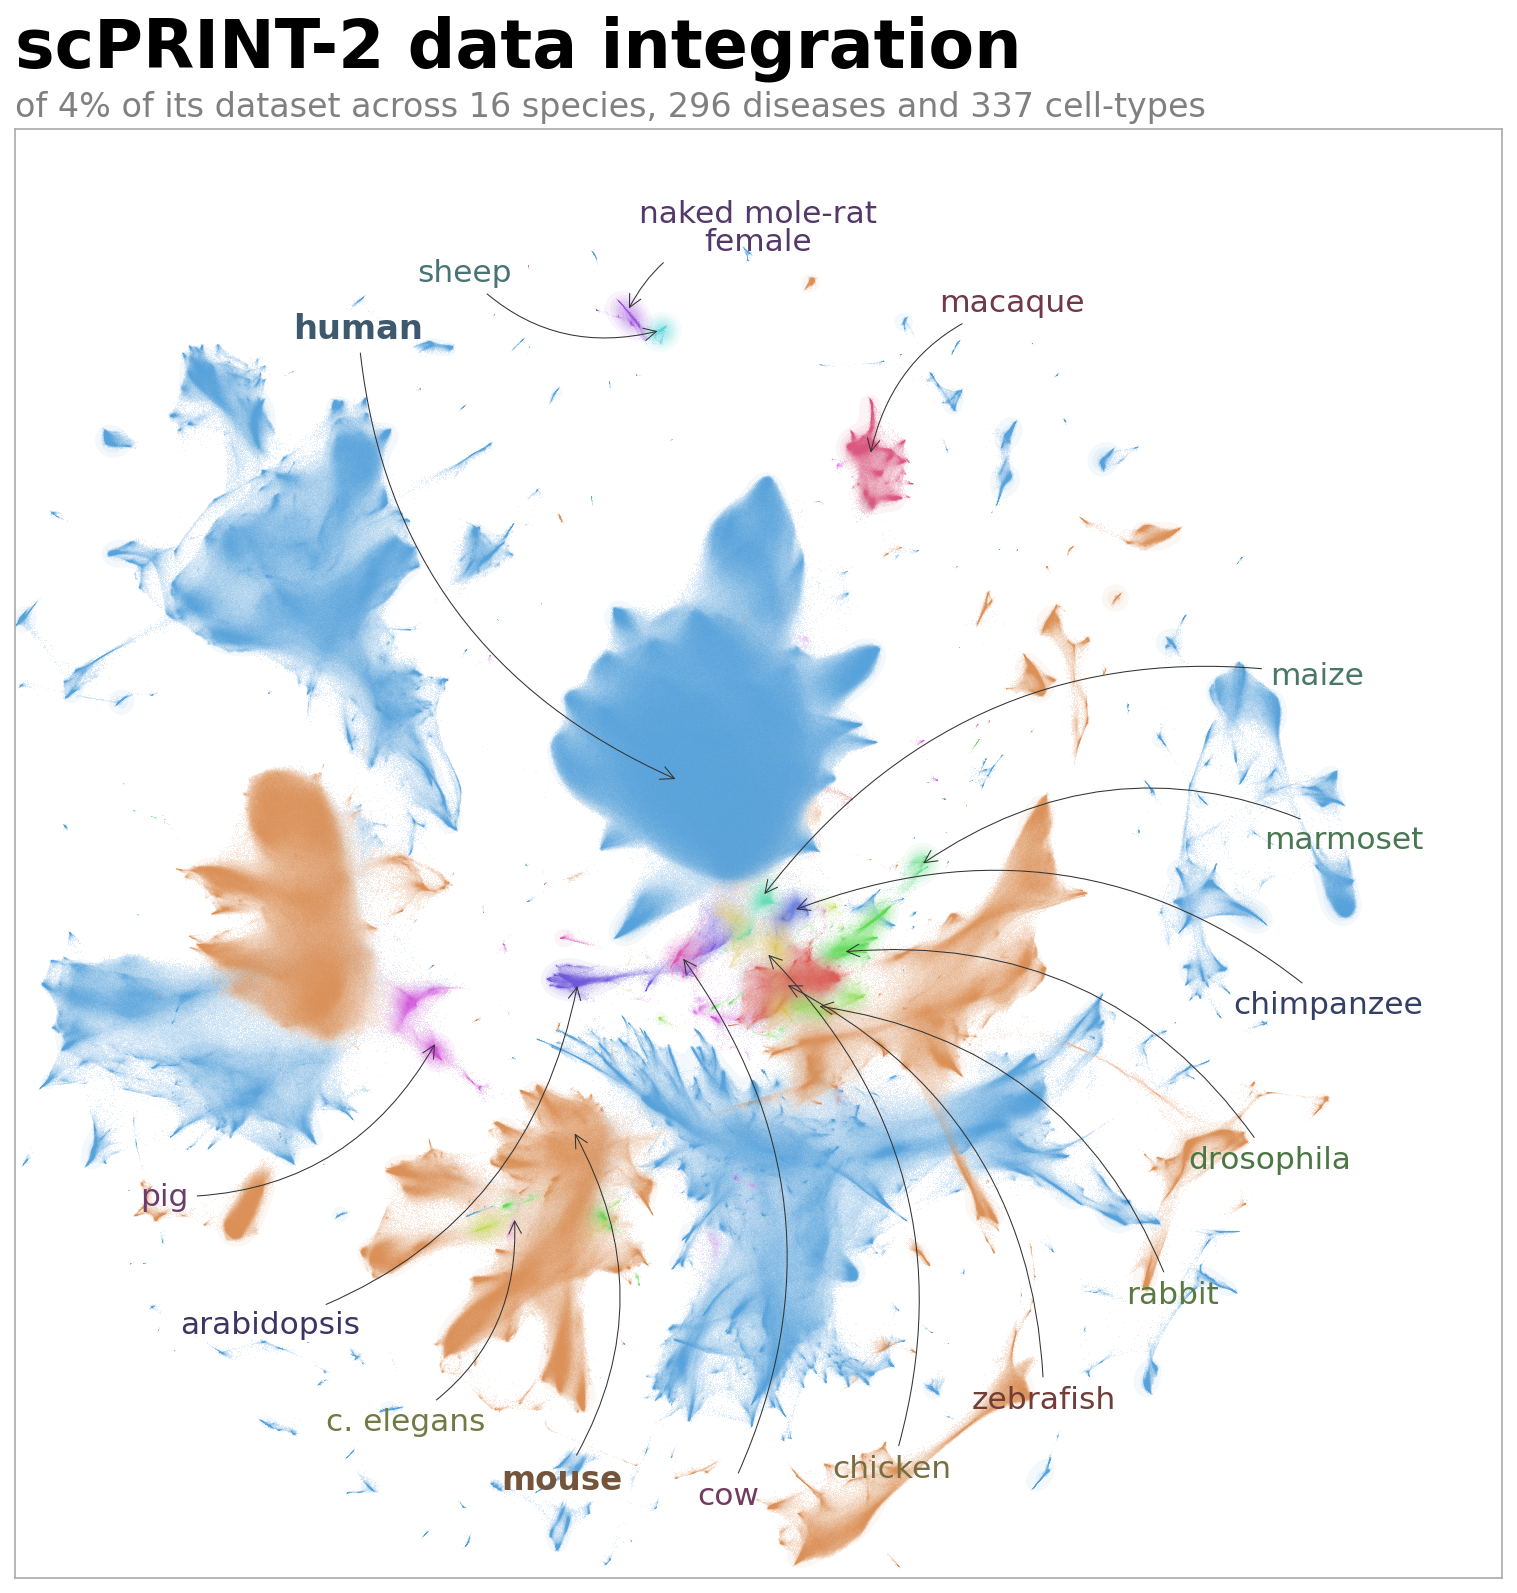

In [112]:
fig, ax = datamapplot.create_plot(
    adata[:].obsm["X_umap"],
    np.array(adata[:].obs["conv_pred_organism_ontology_term_id"].tolist()),
    darkmode=False,
    title="scPRINT-2 data integration",
    sub_title="of 4% of its dataset across 16 species, 296 diseases and 337 cell-types",
    noise_label="None",
    # label_font_size=12,
    max_font_size=18,
    min_font_size=15,
    min_font_weight=400,
    label_color_map=custom_color_map,
    color_label_arrows=False,
    # cmap=colorcet.cm.colorwheel,
    font_family="DejaVu Sans",
    dpi=150,
    use_medoids=True,
    dynamic_label_size=True,
    use_system_fonts=True,
    arrowprops={
        "arrowstyle": "->",
        "connectionstyle": "arc3,rad=0.3",
    },
)
fig.show()

In [72]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

In [113]:
fig.savefig("nice_umap_scprint_2.pdf", bbox_inches="tight")
fig.savefig("nice_umap_scprint_2.png", bbox_inches="tight")

In [ ]:
plot = datamapplot.create_interactive_plot(
    adata[:500_000].obsm["X_umap"],
    adata[:500_000].obs["conv_pred_organism_ontology_term_id"],
    adata[:500_000].obs["conv_pred_cell_type_ontology_term_id"],
    hover_text=("organism: "+adata[:500_000].obs["conv_pred_organism_ontology_term_id"].astype(str) 
    + "\ncell type: "
    + adata[:500_000].obs["conv_pred_cell_type_ontology_term_id"].astype(str)
    + "\ncell culture: "
    + adata[:500_000].obs["pred_cell_culture"].astype(str)
    + "\nassay: "
    + adata[:500_000].obs["conv_pred_assay_ontology_term_id"].astype(str)
    + "\ntissue of origin: "
    + adata[:500_000].obs["conv_pred_tissue_ontology_term_id"].astype(str)
    + "\ndisease of origin: "
    + adata[:500_000].obs["conv_pred_disease_ontology_term_id"].astype(str)
    + "\nage: "
    + adata[:500_000].obs["conv_pred_age_group"].astype(str)
    + "\nsex: "
    + adata[:500_000].obs["pred_sex_ontology_term_id"].astype(str)
    + "\n ethnicity: "
    + adata[:500_000]
    .obs["conv_pred_self_reported_ethnicity_ontology_term_id"]
    .astype(str)
    ),
    font_family="DejaVu Sans",
    enable_search=True,
    inline_data=False,
    use_medoids=True,
    dynamic_label_size=True,
    initial_zoom_fraction=0.9,
)

In [ ]:
plot.save("./nice_umap_scprint3.html")

In [ ]:
adata.obs.loc[
    adata.obs["merge_pred_cell_type_ontology_term_id"]
    == "covid associated t cells (10x 5' v1)",
    "merge_pred_cell_type_ontology_term_id",
] = "covid associated t cells"
adata.obs.loc[
    adata.obs["merge_pred_cell_type_ontology_term_id"]
    == "covid associated t cells (10x 5' v2)",
    "merge_pred_cell_type_ontology_term_id",
] = "covid associated t cells"
adata.obs.loc[
    adata.obs["merge_pred_cell_type_ontology_term_id"] == "normal t cells (10x 5' v2)",
    "merge_pred_cell_type_ontology_term_id",
] = "normal t cells 5'"
adata.obs.loc[
    adata.obs["merge_pred_cell_type_ontology_term_id"] == "normal t cells (10x v2)",
    "merge_pred_cell_type_ontology_term_id",
] = "normal t cells 3'"

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

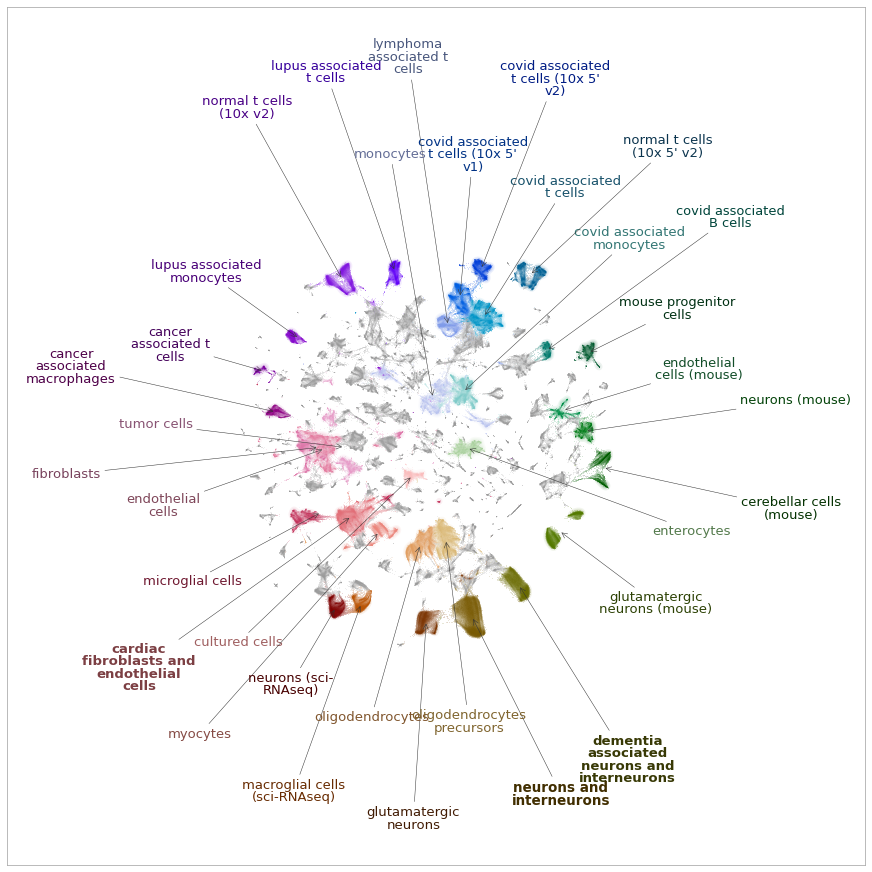

In [ ]:
fig, ax = datamapplot.create_plot(
    adata.obsm["X_umap"],
    np.array(adata.obs["merge_pred_cell_type_ontology_term_id"].tolist()),
    darkmode=False,
    title="",
    noise_label="None",
    # label_font_size=12,
    cmap=colorcet.cm.colorwheel,
    max_font_size=15,
    min_font_size=13,
    font_family="Arial",
    dynamic_label_size=True,
    label_base_radius=5.0
    arrowprops={
        "arrowstyle": "->",
        #  "connectionstyle":"arc3,rad=0.3",
    },
)
fig.show()

In [ ]:
fig.savefig(
    "../pred_celltype_sampled_2M_datamap.pdf", backend="cairo", transparent=True
)

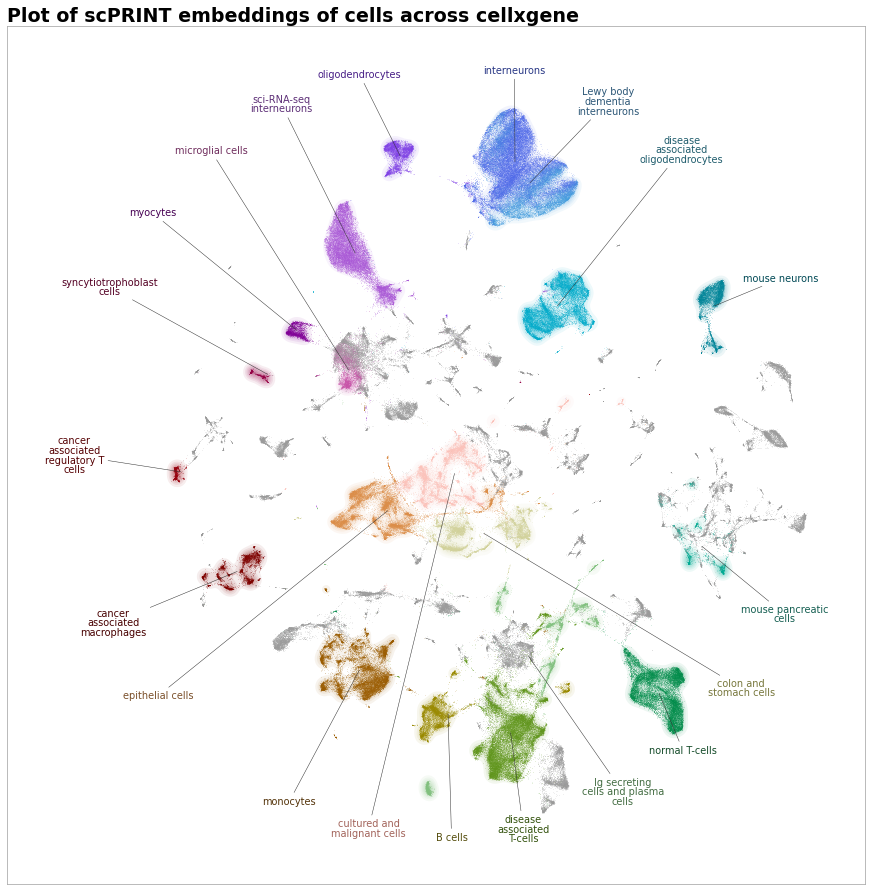

In [ ]:
fig, ax = datamapplot.create_plot(
    adata.obsm["X_umap"],
    np.array(adata.obs["merge_pred_cell_type_ontology_term_id"].tolist()),
    darkmode=False,
    title="Plot of scPRINT embeddings of cells across cellxgene",
    noise_label="None",
)
fig.savefig("../pred_celltype_sampled_1M_datamap.pdf", bbox_inches="tight")
fig.show()